# Statistical estimation and error bars

数据可视化过程中的一个常见步骤，即聚合或估计。在这个步骤中，多个数据点被简化为一个汇总统计量，例如平均值或中位数。当展示汇总统计量时，通常适宜添加误差条，因为它们提供了关于汇总统计量如何代表其背后数据点的视觉线索。

这里的关键点包括：

1. **数据聚合**：将多个数据点合并成一个单一的统计量，以便更容易地理解和展示数据。
2. **汇总统计量**：如平均值（mean）和中位数（median），这些是数据集中趋势的度量。
3. **误差条**：在图表上添加的垂直或水平线段，用来表示统计估计的不确定性。它们通常位于汇总统计量的两侧，显示了估计值的波动范围或置信区间。
4. **视觉线索**：误差条为观察者提供了关于汇总统计量准确性和可靠性的视觉信息，帮助他们理解数据的变异性和估计的可信度。

误差条（error bars）在统计估计中的两种主要用途。误差条通常围绕中心趋势的估计值（如均值或中位数）展示，它们可以表示以下两种情况之一：

1. **估计的不确定性范围**：这指的是对于中心趋势估计值的可信度或准确性的不确定性。如果数据分布广泛，即数据点之间的差异较大，那么对于中心趋势的估计就会有更多的不确定性。

2. **数据本身的分布范围**：这指的是数据点围绕中心趋势的分布情况。如果数据点紧密聚集在中心趋势周围，那么分布范围较小；如果数据点分散，分布范围则较大。

**这两种度量是相关的：在相同的样本大小下，如果数据分布更广，那么对于中心趋势的估计就会有更多的不确定性。但是，随着样本大小的增加，不确定性会减少，而数据的分布范围则不会因样本大小的增加而改变。**

简而言之，误差条提供了一种视觉提示，帮助我们理解数据点是如何围绕中心趋势分布的，以及这种分布的估计值的可靠性。样本大小对于减少估计的不确定性很重要，但并不能改变数据本身的分布特性。

在Seaborn（一个Python的数据可视化库）中，构建误差条（error bars）有两种方法。一种方法是参数化的（parametric），它依赖于对数据分布形状的假设来使用特定的公式。另一种方法是非参数化的（nonparametric），它仅使用你提供的原始数据。

- **参数化方法**：这种方法使用一个基于数据分布形状假设的公式来计算误差条。例如，如果假设数据是正态分布的，那么可以使用标准误差（standard error）来计算误差条，它是样本标准差除以样本大小的平方根。这种方法通常适用于当你知道数据遵循某种特定分布时。

- **非参数化方法**：这种方法不依赖于数据分布的任何假设，它直接使用数据集中的值来计算误差条。例如，可以使用百分位区间（percentile interval）来表示数据的分布范围，这不需要对数据的分布形状做出任何假设。

选择哪种方法取决于数据的特性和你分析的具体需求。如果你对数据的分布有一定的了解，并且数据确实遵循某种分布，那么参数化方法可能更合适。如果你不确定数据的分布或者数据不遵循常见的分布，那么非参数化方法可能更加稳健。

在数据可视化中，如何使用误差条（error bars）来展示数据的聚合或估计的不确定性和分布范围。误差条是一种在图表中表示数据点估计值不确定性或分布范围的视觉辅助工具。

两种误差条的定义方式，即参数化（parametric）和非参数化（nonparametric）方法：

1. **参数化误差条**：在这种方法中，误差条的大小是通过一个标量因子（scalar factor）来定义的，这个因子乘以定义误差的统计量（比如标准误差或标准差）。这种方法依赖于对数据分布形状的某些假设。

2. **非参数化误差条**：与参数化方法不同，非参数化误差条的大小是通过百分位宽度（percentile width）来定义的。这意味着误差条的范围是基于数据样本直接计算得出的百分位数区间，不依赖于对数据分布的任何假设。

具体来说，参数化误差条通常使用标准误差或标准差来计算，而标准误差是标准差除以样本大小的平方根。非参数化误差条则可能使用例如95%的百分位区间，即从第2.5百分位数到第97.5百分位数的范围。

在选择合适的误差条方法时，需要考虑数据的特性和分析的目的。例如，如果数据分布是偏斜的或者有自然界限，使用非参数化方法可能更合适，因为它可以适应数据的非对称分布，并且不会超出数据的实际范围。而参数化方法则在数据符合某些分布假设时更为简便和直接。

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

In [2]:
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=0.3, ax=axs[0])
    sns.stripplot(x=x, jitter=0.3, ax=axs[1])

## Measures of data spread

代表数据分布范围的误差条（error bars）提供了一种紧凑的数据分布展示方式。这里提到的“三个数字”可能是指误差条通常表示的最小值、最大值和中位数，或者是指误差条表示的三个标准差（-1σ, 0, +1σ）。相比之下，箱线图（boxplot）通常会展示更多的统计量，比如最小值、第一四分位数（Q1）、中位数、第三四分位数（Q3）、最大值，以及可能的异常值，所以会使用五个或更多的数值。小提琴图（violinplot）则使用一种更复杂的算法来展示数据的分布情况，它结合了箱线图和密度图的特点，可以展示数据的分布密度。

简单来说，这句话强调了误差条作为一种简洁的数据分布展示方法，与箱线图和小提琴图相比，它用更少的数值来概括数据的分布情况。

### Standard deviation error bars

1. "Standard deviation error bars are the simplest to explain, because the standard deviation is a familiar statistic."
   标准差误差条是最简单的，因为标准差是一个大家熟悉的统计量。

2. "It is the average distance from each data point to the sample mean."
   标准差是每个数据点到样本均值的平均距离。

3. "By default, errorbar="sd" will draw error bars at +/- 1 sd around the estimate, but the range can be increased by passing a scaling size parameter."
   默认情况下，设置errorbar="sd"会在估计值周围绘制±1个标准差的误差条，但通过传递一个缩放大小参数，可以增加这个范围。

4. "Note that, assuming normally-distributed data, ~68% of the data will lie within one standard deviation, ~95% will lie within two, and ~99.7% will lie within three:"
   注意，假设数据是正态分布的，大约68%的数据会落在一个标准差之内，大约95%的数据会落在两个标准差之内，而大约99.7%的数据会落在三个标准差之内。

标准差误差条的基本概念和如何使用它们来表示数据的不确定性。标准差是一个衡量数据点分布离散程度的指标，而误差条则提供了一个视觉表示，显示了估计值的不确定性范围。在正态分布的假设下，这些误差条可以帮助我们了解数据的分布情况。


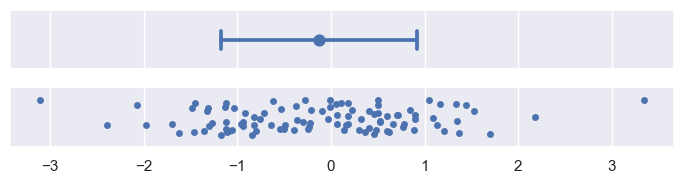

In [4]:
plot_errorbars("sd")

### Percentile interval error bar

百分位区间也代表了数据中一定量数据的分布范围，但它们是通过直接从你的样本中计算这些百分位来实现的。默认情况下，设置`errorbar="pi"`会显示一个95%的区间，这个区间从2.5%的百分位到97.5%的百分位。你可以通过传递一个大小参数来选择不同的范围，例如，要显示四分位间距：

- 百分位区间（Percentile intervals）：这是一种统计学上用来表示数据分布范围的方法，它通过计算数据集中的特定百分位值来确定数据的最小值和最大值。
- 直接从样本计算百分位（computing those percentiles directly from your sample）：这意味着百分位区间是通过直接分析你的数据样本来确定的，而不是基于任何预设的分布或假设。
- 默认情况下的95%区间（By default, errorbar="pi" will show a 95% interval）：当你在图表中使用百分位误差条（percentile intervals）时，默认情况下会展示95%的置信区间，这个区间覆盖了从2.5%到97.5%的百分位。
- 范围选择（You can choose a different range by passing a size parameter）：如果你需要显示不同的百分位区间，可以通过设置一个大小参数（size parameter）来实现。
- 四分位间距（to show the inter-quartile range）：这是一种特定的百分位区间，显示了数据的中间50%的分布范围，通常指的是25%的百分位到75%的百分位，这个范围可以更好地反映数据的中心趋势，而不受极端值的影响。

简而言之，这段话描述了如何使用百分位区间来表示数据的分布范围，并解释了如何通过设置不同的参数来调整这些区间的范围。

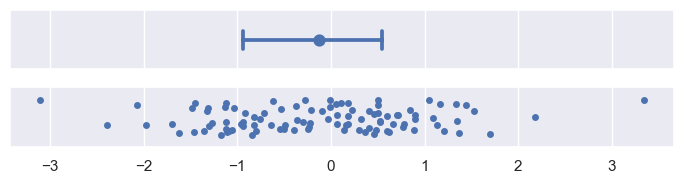

In [5]:
plot_errorbars(("pi", 50))

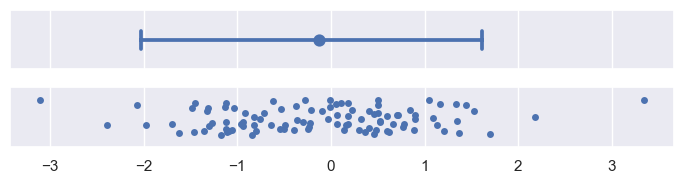

In [7]:
plot_errorbars(("pi", 95))

标准差误差条（standard deviation error bars）在数据可视化中的使用及其局限性。标准差是衡量数据点与样本均值平均距离的统计量。在数据呈现正态分布时，标准差误差条通常对称地围绕估计值展开，表示数据的变异性。然而，当数据呈现偏态分布（skewed），尤其是当数据有自然界限时（例如，数据代表的量只能是正值），标准差误差条可能会延伸到“不可能”的值。

具体来说，标准差误差条的问题在于：

1. **对称性**：它们总是对称地围绕估计值展开，即使数据本身是不对称的。
2. **偏态数据**：当数据分布不均匀，特别是当数据集中的大部分值倾向于一个方向时，对称的误差条可能无法准确反映数据的真实分布。
3. **自然界限**：如果数据有自然界限，比如只能为正值，那么负的标准差误差条就没有意义。
4. **不可能的值**：在某些情况下，标准差误差条可能会超出数据的实际范围，指向一些实际上不可能的数据点。

相比之下，非参数方法（nonparametric approach）可以避免这些问题，因为它：

- 考虑了数据的不对称性（asymmetrical spread）。
- 不会超出数据的实际范围，因为它仅使用提供的数据来构建误差条。

非参数方法通常使用百分位数（percentiles）或其他基于数据的统计量来构建误差条，这使得它们能够更灵活地适应数据的实际分布，即使数据分布是偏态的或有界限的。

## Measures of estimate uncertainty

如果你的数据是从更大的总体中随机抽取的样本，那么你计算出的平均值（或其他估计值）可能不会完美地反映总体的真实平均值。存在一定的估计不确定性，这种不确定性可以通过误差条（error bars）来表示，误差条试图展示真实参数可能值的范围。

具体来说，误差条是一种可视化手段，用于表示统计估计的不确定性。它们通常以图表上的线段或条形图的延伸部分出现，显示估计值周围可能的误差范围。这样做可以帮助观察者理解数据估计的可靠性，以及在不同样本或不同估计方法下可能得到的结果的变异性。

### Standard error bars

标准误差（standard error statistic）与标准差（standard deviation）之间的关系。标准误差是一种衡量数据分布离散程度的统计量，它与样本大小有关。具体来说：

1. **标准误差与标准差的关系**：标准误差实际上是标准差除以样本大小的平方根。这里的“标准差”是指数据集中各数据点与平均值（mean）的偏差的平方的平均值的平方根，它反映了数据的离散程度。

2. **标准误差的计算公式**：如果用 $ \sigma $ 表示标准差，$ n $ 表示样本大小，那么标准误差 $ SE $ 的计算公式可以表示为：

$$ SE = \frac{\sigma}{\sqrt{n}} $$

3. **误差条形图（error bars）**：在图表中，误差条形图是一种用来表示数据不确定性的方法。当设置 `errorbar="se"` 时，默认情况下会在平均值的基础上绘制一个区间，这个区间的宽度是标准误差的两倍（即平均值加减1个标准误差），用以表示数据的大致波动范围。

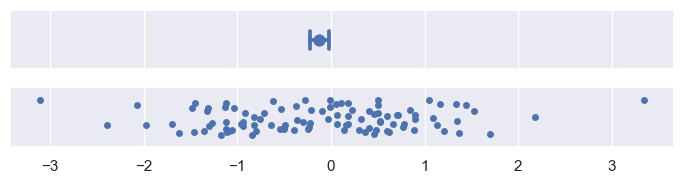

In [8]:
plot_errorbars("se")

### Confidence interval error bars

一种非参数方法来表示不确定性，这种方法使用了一个称为“bootstrapping”的程序。Bootstrapping是一种统计技术，它通过以下步骤来估计统计量的不确定性：

1. **随机重采样**：首先，原始数据集被随机地重新抽样多次，每次抽样都是有放回的，这意味着同一个数据点可能被多次选中。
2. **重新计算估计值**：在每次重采样后，都会根据新的样本重新计算统计量的估计值。
3. **创建统计分布**：通过这种方式，我们可以得到一个统计量的分布，这个分布近似于如果我们有另一个样本，可能得到的估计值的分布。

接着，通过bootstrap分布来构建置信区间：

- **置信区间的构建**：置信区间是通过选取bootstrap分布的某个百分位数区间来构建的。默认情况下，如果使用`errorbar="ci"`，绘制的是95%的置信区间。这意味着，如果我们多次重复整个实验过程，有95%的概率我们的置信区间会包含真实的参数值。

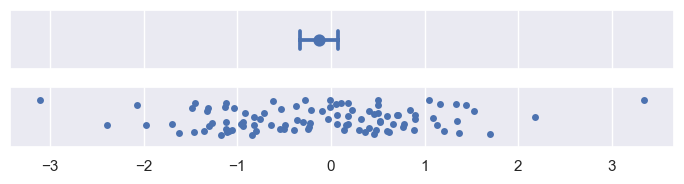

In [9]:
plot_errorbars("ci")

非参数自举法（nonparametric bootstrap）的优势，以及它与百分位区间（percentile interval）的相似之处。以下是对这段内容的解释：

1. **自举法适应性**：自举法能够自然地适应偏斜（skewed）和有界（bounded）的数据。这与标准误差区间（standard error interval）不同，后者通常假设数据是正态分布的。自举法不依赖于数据分布的假设，因此可以更好地处理实际数据中可能存在的分布偏差。

2. **自举法的通用性**：自举法不仅适用于均值估计，还可以用于计算任何估计量的误差条（error bars）。这意味着，除了计算均值的置信区间外，还可以使用自举法来计算中位数、众数或其他统计量的置信区间。

3. **标准误差公式的局限性**：标准误差的计算公式是针对均值的，它依赖于数据的方差和样本大小。如果数据分布不是正态的，或者样本量较小，标准误差可能无法准确反映估计的不确定性。

4. **自举法的计算**：自举法通过从原始数据集中随机抽取样本（有放回抽样）多次，然后对每次抽取的样本重新计算估计值，从而构建一个统计量的分布。这个分布可以用来估计任何统计量的置信区间。

5. **自举法的灵活性**：由于自举法可以应用于任何估计量，它提供了一种灵活的方法来评估统计估计的不确定性，特别是在数据不满足正态分布或其他标准分布假设的情况下。

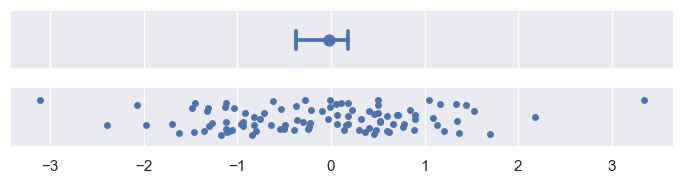

In [10]:
plot_errorbars("ci", estimator="median")

在统计分析中使用自举法（bootstrapping）时的一些特性和控制参数。自举法是一种非参数的统计方法，用于估计统计量的不确定性。下面是对这段内容的解释：

1. **自举法涉及随机性**：自举法通过从原始数据集中随机有放回地抽取样本来进行多次重复的统计估计。这种随机抽样的方式意味着每次运行代码时，得到的误差条（error bars）可能会略有不同。

2. **控制参数**：为了控制自举法的随机性，可以设置几个参数：
   - `n_boot`：这个参数设置自举法的迭代次数。迭代次数越多，得到的置信区间（confidence intervals）就越稳定，因为更多的迭代可以更好地估计统计量的分布。
   - `seed`：这个参数设置随机数生成器的种子。通过设置种子，可以确保每次运行代码时得到的结果都是相同的，这有助于复现实验结果。

简而言之，自举法通过随机抽样来估计统计量的不确定性，可以通过调整迭代次数和随机数种子来控制误差条的稳定性和结果的可复现性。

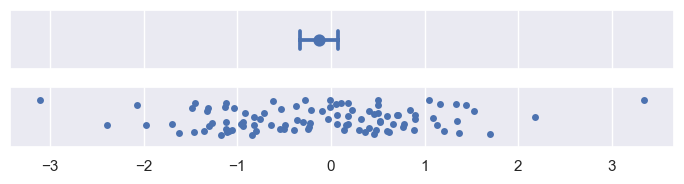

In [11]:
plot_errorbars("ci", n_boot=5000, seed=10)

### Custom error bars

如果现有的绘图方法或者错误条（error bars）的设置选项不能满足你的需求，你可以通过传递一个通用函数（generic function）给`errorbar`参数来自定义错误条的计算方式。这个函数需要接收一个向量（vector，即一组数值）作为输入，然后输出一对值，这对值分别代表这个区间的最小值和最大值。

简单来说，就是你可以定义一个函数，告诉绘图程序如何根据你的数据计算出错误条的边界。例如，如果你的数据是一个包含多个数值的列表，你可以写一个函数来计算这个列表的最小值和最大值，然后将这两个值作为错误条的上下边界。在Python的matplotlib库中，这可以通过定义一个lambda函数来实现，如示例中的`lambda x: (x.min(), x.max())`，这个函数接受一个向量`x`，并返回这个向量的最小值和最大值作为错误条的范围。

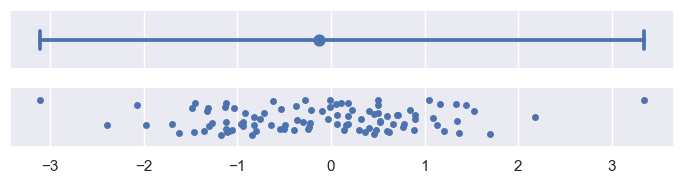

In [12]:
plot_errorbars(lambda x: (x.min(), x.max()))

在使用 seaborn 绘图库时可能遇到的限制。它说明 seaborn 函数目前不能直接使用外部计算得出的值来绘制误差条（error bars）。然而，如果需要在 seaborn 绘图中添加这样的误差条，可以使用 matplotlib 的函数来实现。

具体来说，如果你有一些已经计算好的数据，比如你已经通过某种方式得到了误差估计，但你希望在 seaborn 绘制的图表中展示这些误差，你不能直接使用 seaborn 的 `errorbar` 参数来添加这些外部计算的误差条。相反，你需要使用 matplotlib 的绘图功能来手动添加这些误差条到 seaborn 生成的图表上。

这通常意味着你需要对 seaborn 和 matplotlib 的绘图接口有一定的了解，以便能够在 seaborn 图表的基础上，使用 matplotlib 的工具来进一步定制你的图表，包括添加误差条。这可以提供更大的灵活性，但同时也可能需要更多的编程工作来实现。